In [1]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt


# 

# Node sampling: induced subgraph sampling

In [2]:
def induced_subgraph_sampling(G, n):
    """
    Samples an induced subgraph of `n` nodes from the input graph `G`.
    
    Parameters
    ----------
    G : networkx.Graph
        The input graph from which the subgraph is sampled.
    n : int
        The number of nodes to include in the sampled induced subgraph.
    
    Returns
    -------
    subgraph : networkx.Graph
        The induced subgraph with `n` nodes and the edges among them.
        
    Raises
    ------
    ValueError
        If `n` is larger than the number of nodes in the graph.
    """
    # Ensure `n` is not larger than the number of nodes in G
    if n > G.number_of_nodes():
        raise ValueError("`n` must be less than or equal to the number of nodes in the graph.")
    
    # Get the list of nodes in the graph
    nodes = list(G.nodes())
    
    # Randomly sample `n` nodes without replacement
    sampled_nodes = np.random.choice(nodes, size=n, replace=False)
    
    # Create an induced subgraph of G using the sampled nodes
    subgraph = G.subgraph(sampled_nodes).copy()
    
    return subgraph

### Generate an Erdos-Renyi (ER) and Watts-Strogatz (WS) network

100.0
Average degree ER: 99.856
Average degree WS: 100.0


Text(0.5, 0, '$k_i$')

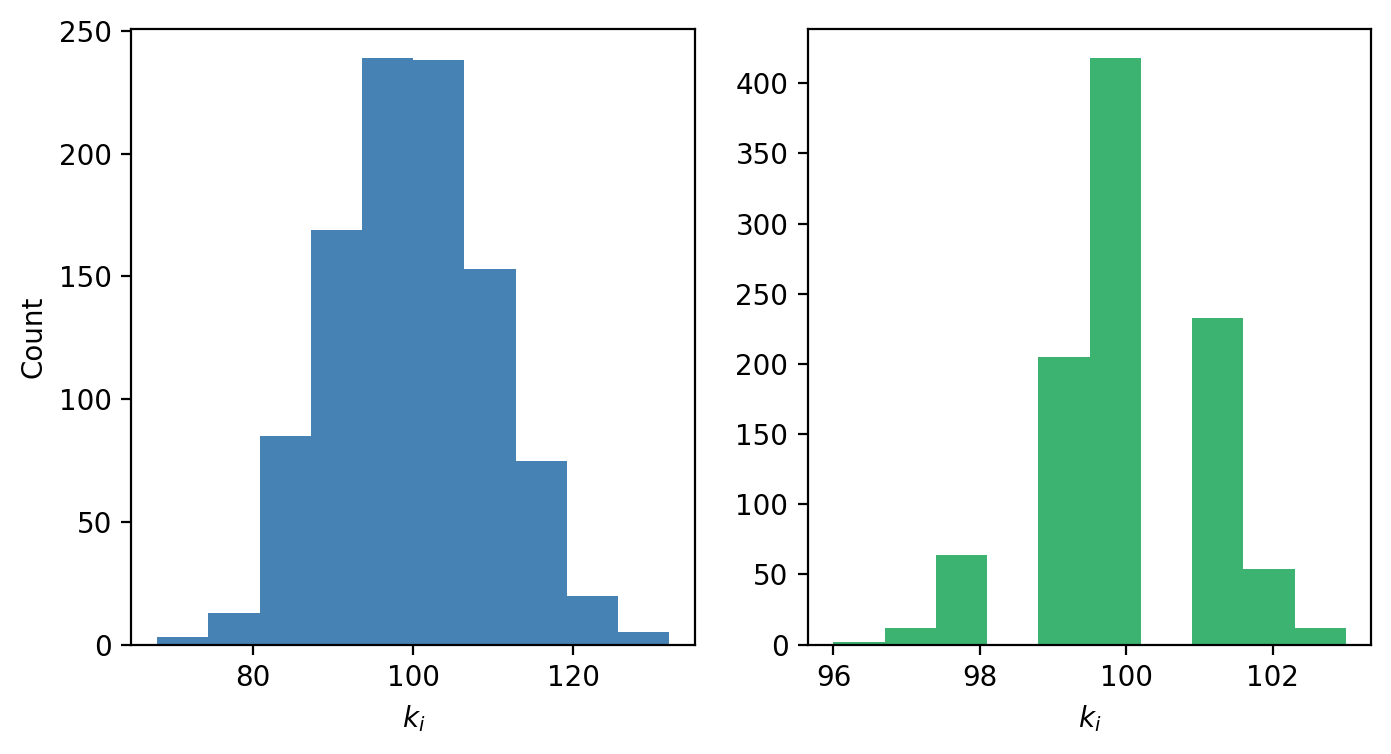

In [12]:
N = 1000
M = 50000
average_degree = 2*M/N
print(average_degree)

p = average_degree/(N-1)
G_er = nx.erdos_renyi_graph(N,p)
G_ws = nx.watts_strogatz_graph(N, int(average_degree), p=0.01)

print("Average degree ER:", np.mean(list(dict(G_er.degree()).values())))
print("Average degree WS:",  np.mean(list(dict(G_ws.degree()).values())))

fig, ax = plt.subplots(1,2,figsize=(8,4),dpi=200)
cols = ['steelblue','mediumseagreen']

ax[0].hist(dict(G_er.degree()).values(),color=cols[0])
ax[0].set_xlabel(r'$k_i$')
ax[0].set_ylabel('Count')

ax[1].hist(dict(G_ws.degree()).values(),color=cols[1])
ax[1].set_xlabel(r'$k_i$')

### Sample different fractions of nodes

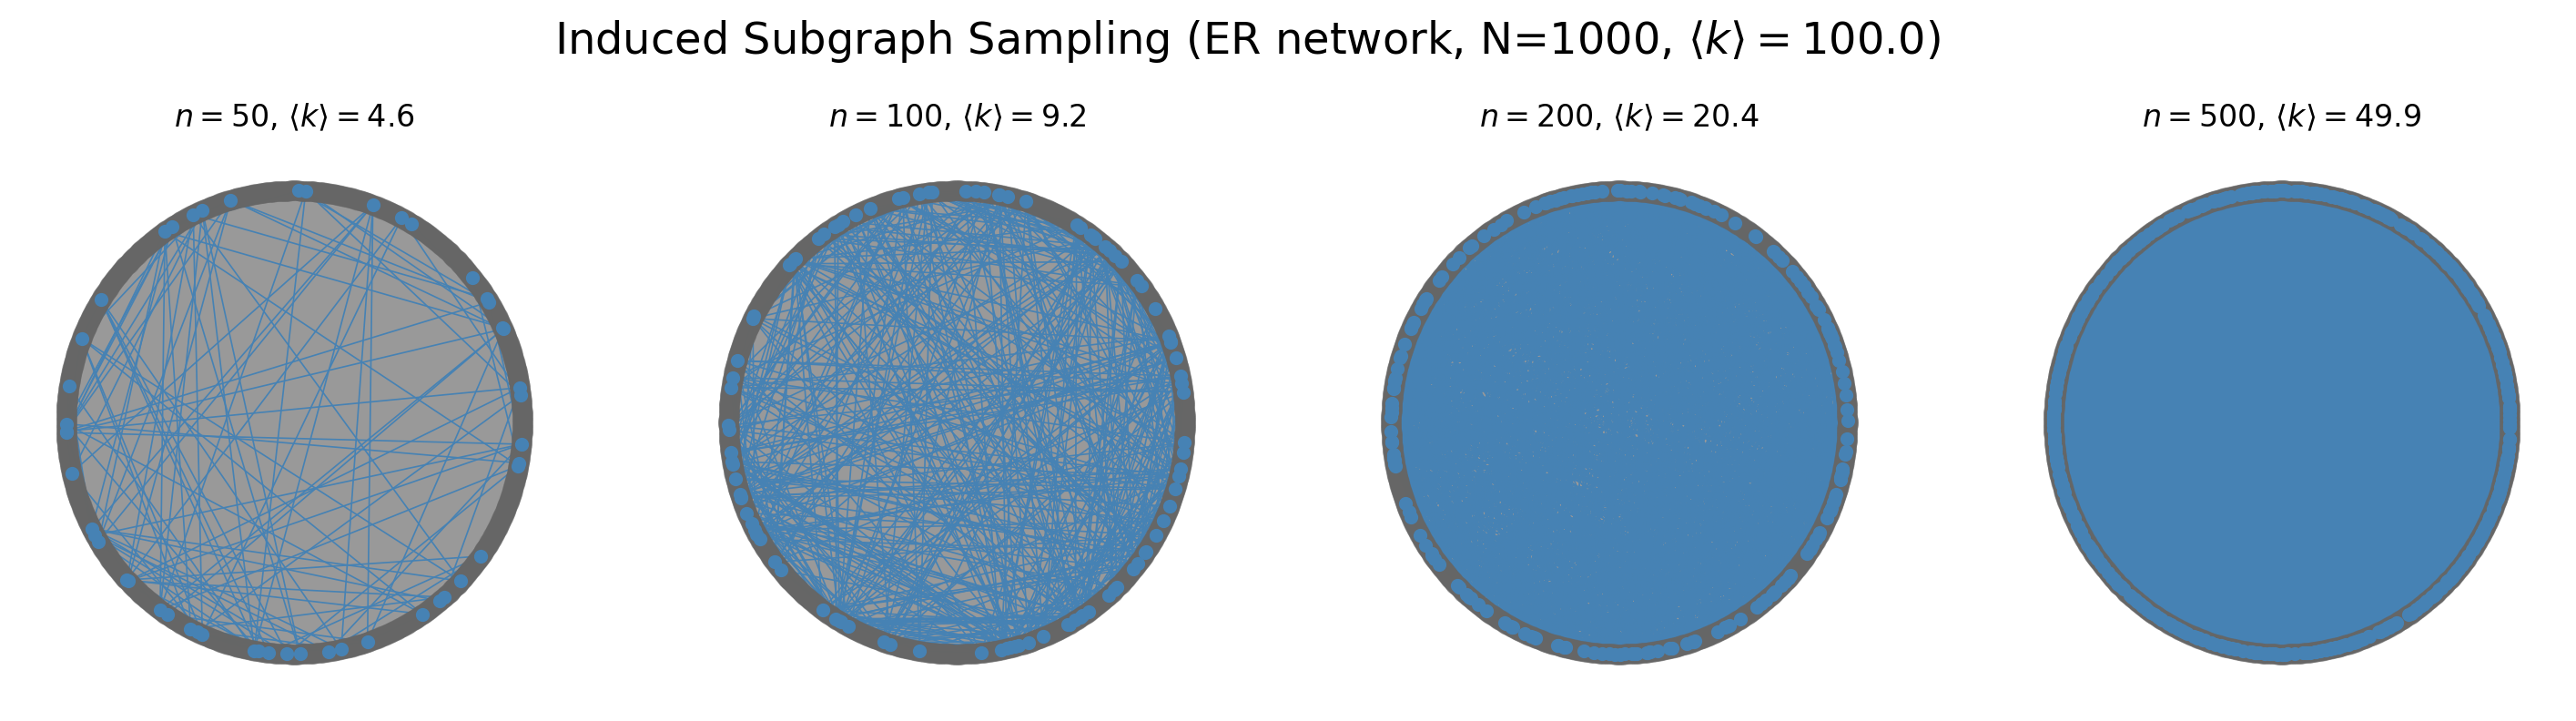

In [25]:
pos = nx.circular_layout(G_er)

fig, ax = plt.subplots(1,4,figsize=(18,4),dpi=200)

for ni,n in enumerate([50,100,200,500]):
    subg = induced_subgraph_sampling(G_er, n)
    nx.draw(G_er, pos, node_color='.4', node_size=50, alpha=0.5, edge_color='.6', width=0.6, ax=ax[ni])
    nx.draw(subg, pos, node_color=cols[0],node_size=20, edge_color=cols[0], width=0.6, ax=ax[ni])
    ax[ni].set_title(r'$n = %i$, $\langle k \rangle = %.1f$'%(n, np.mean(list(dict(subg.degree).values()))))

plt.suptitle(r'Induced Subgraph Sampling (ER network, N=%i, $\langle k \rangle = %.1f$)'%(
    G_ws.number_of_nodes(),average_degree),
             y=1.05, fontsize='xx-large')
plt.show()

Text(0, 0.5, 'Count')

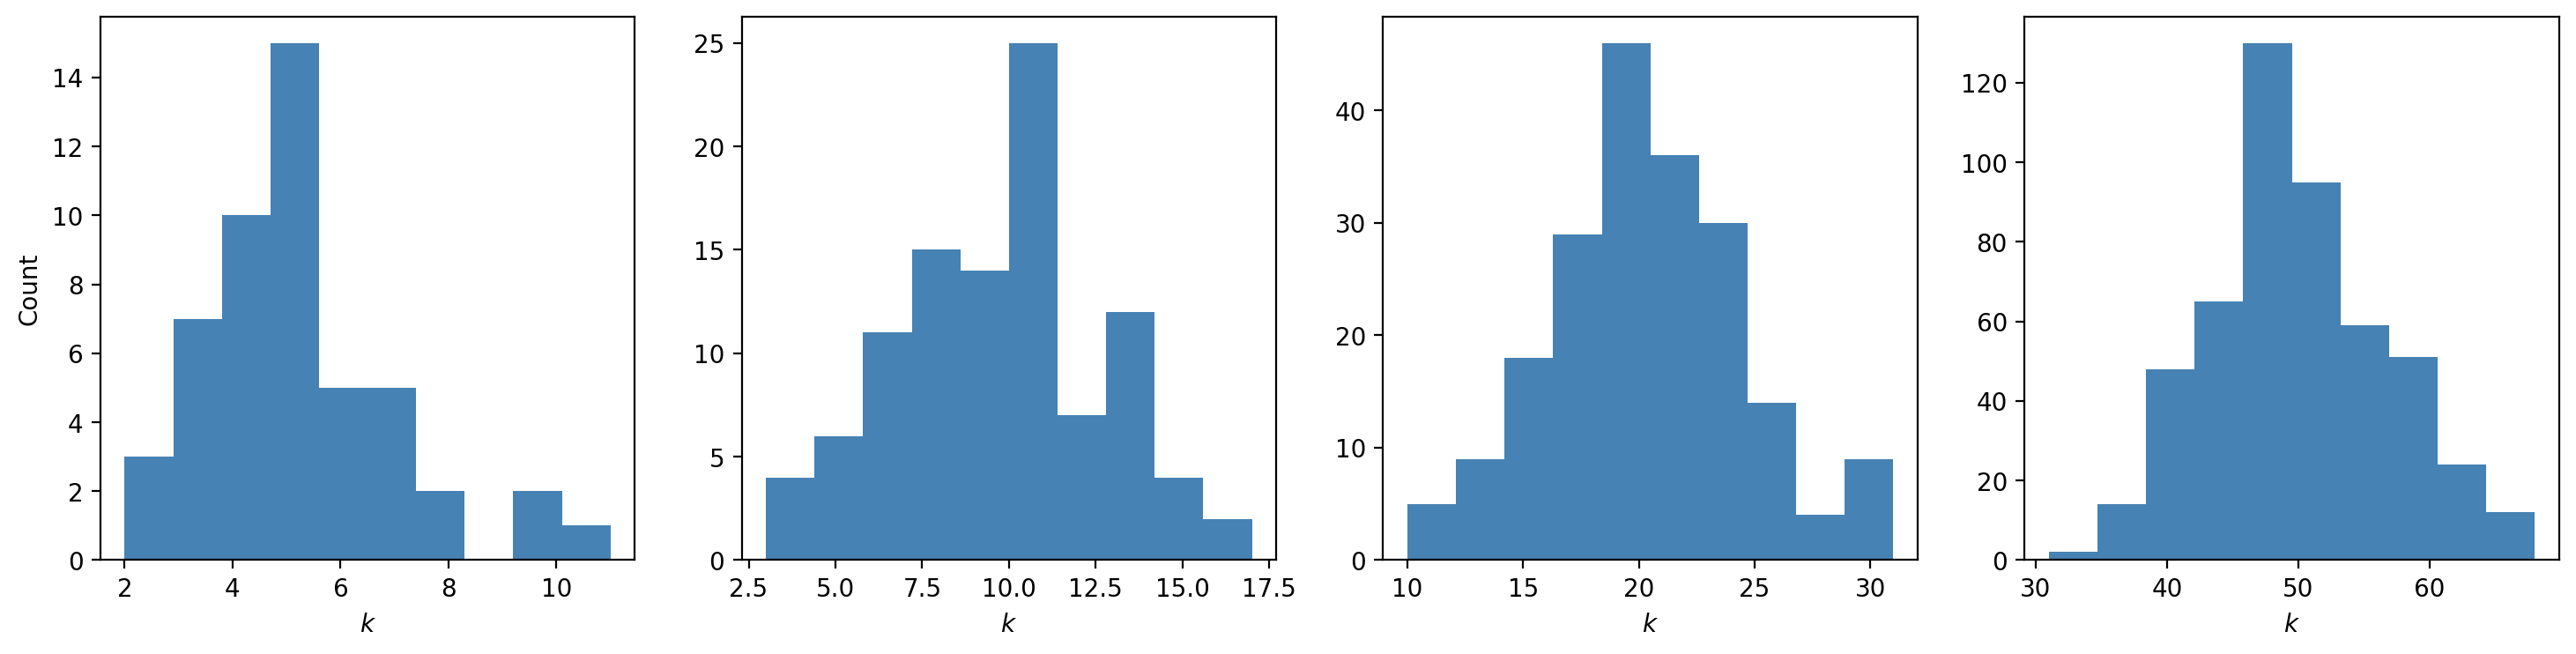

In [21]:
fig, ax = plt.subplots(1,4,figsize=(18,4),dpi=200)

for ni,n in enumerate([50,100,200,500]):
    subg = induced_subgraph_sampling(G_er, n)    
    ax[ni].hist(dict(subg.degree()).values(),color=cols[0])
    ax[ni].set_xlabel(r'$k$')

ax[0].set_ylabel('Count')

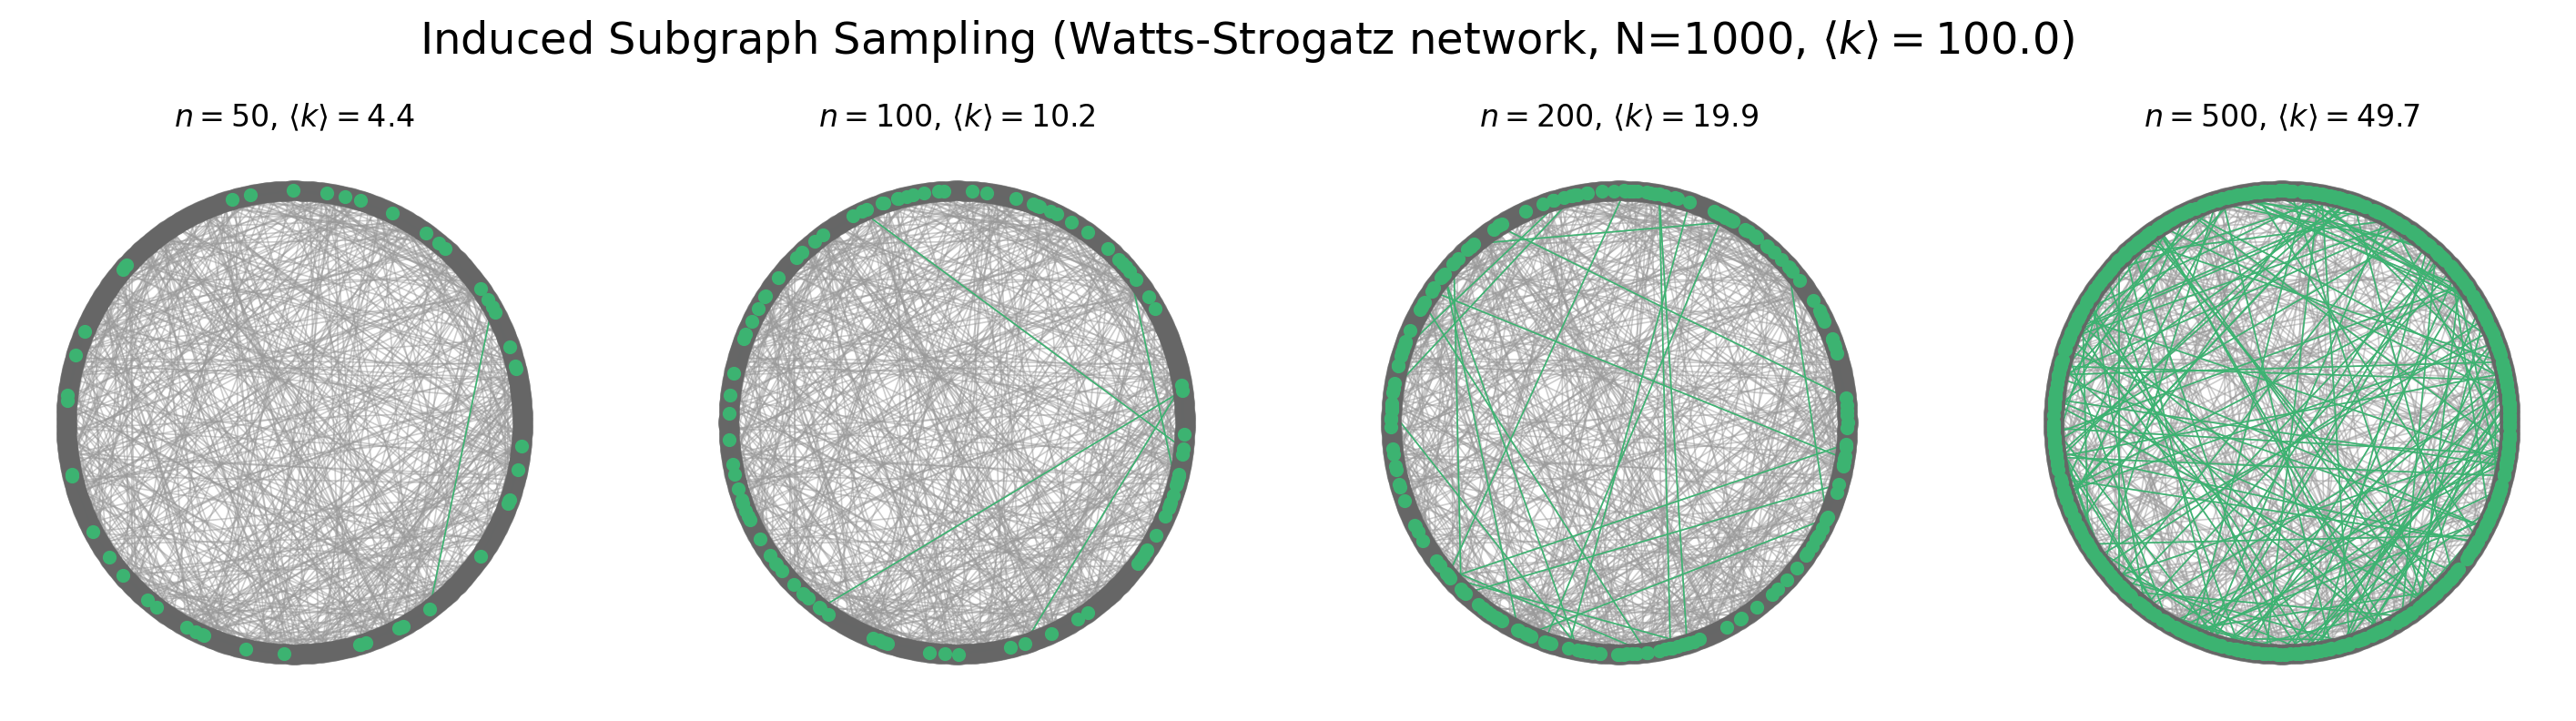

In [24]:
pos = nx.circular_layout(G_ws)

fig, ax = plt.subplots(1,4,figsize=(18,4),dpi=200)

for ni,n in enumerate([50,100,200,500]):
    subg = induced_subgraph_sampling(G_ws, n)
    nx.draw(G_ws, pos, node_color='.4', node_size=50, alpha=0.5, edge_color='.6', width=0.6, ax=ax[ni])
    nx.draw(subg, pos, node_color=cols[1],node_size=20, edge_color=cols[1], width=0.6, ax=ax[ni])
    ax[ni].set_title(r'$n = %i$, $\langle k \rangle = %.1f$'%(n, np.mean(list(dict(subg.degree).values()))))

plt.suptitle(r'Induced Subgraph Sampling (Watts-Strogatz network, N=%i, $\langle k \rangle = %.1f$)'%(
    G_ws.number_of_nodes(),average_degree),
             y=1.05, fontsize='xx-large')
plt.show()

Text(0, 0.5, 'Count')

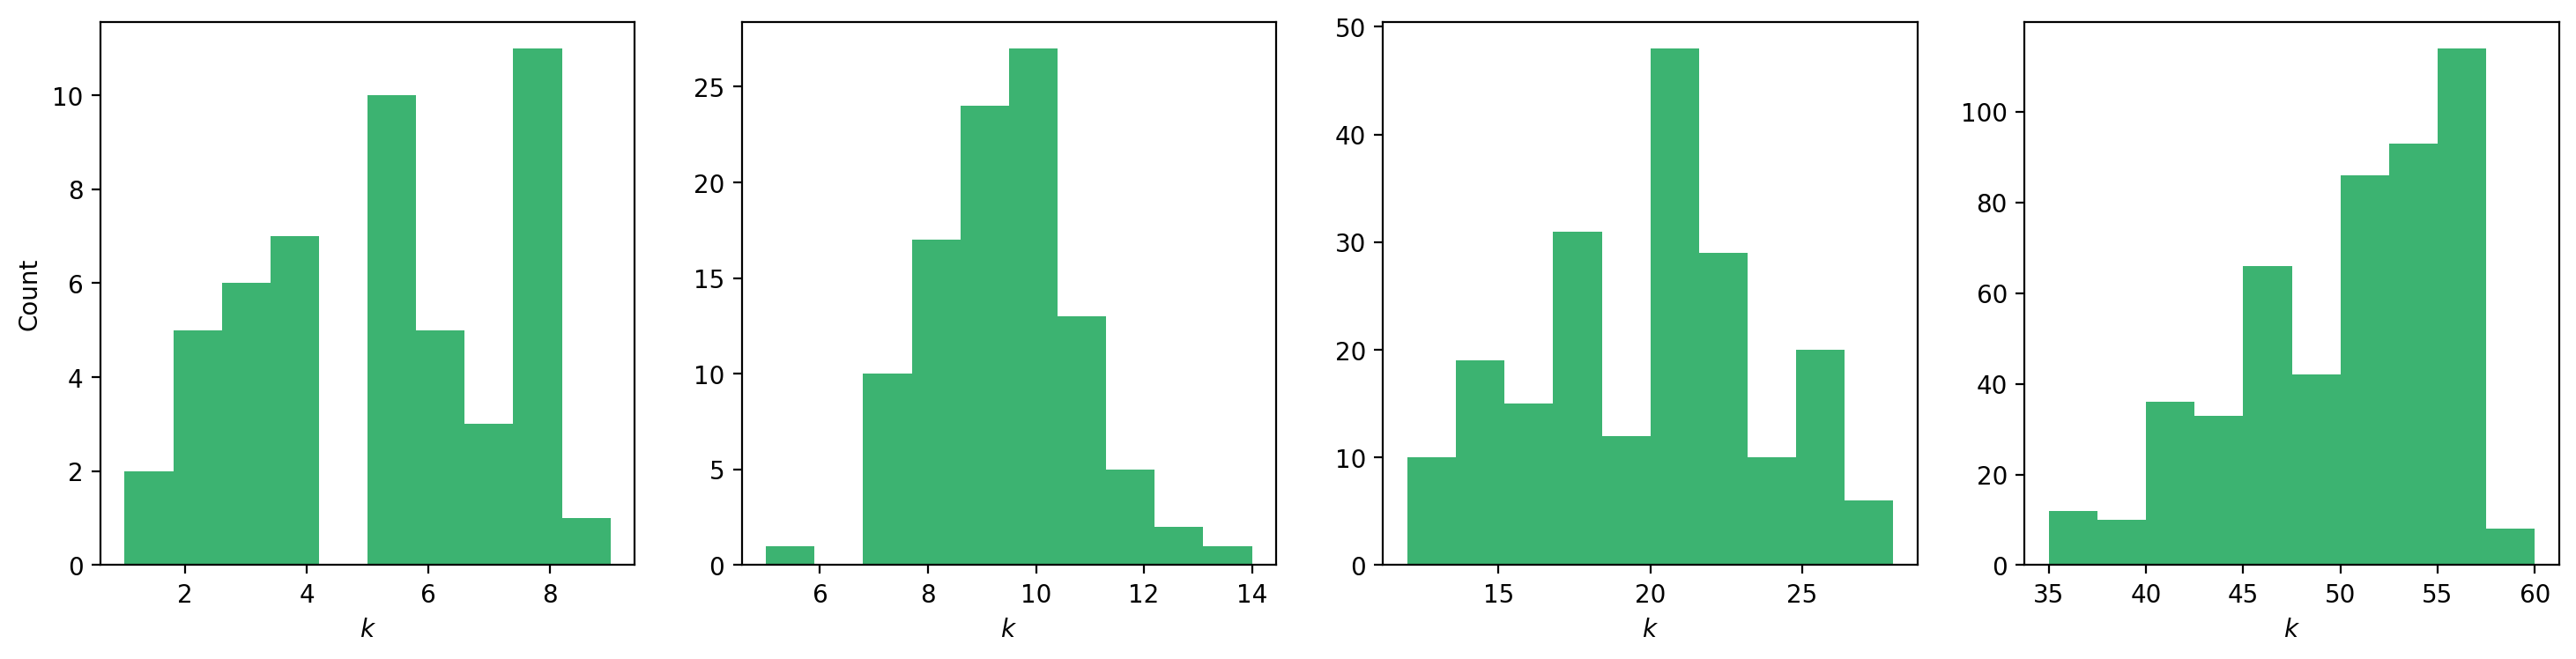

In [22]:
fig, ax = plt.subplots(1,4,figsize=(18,4),dpi=200)

for ni,n in enumerate([50,100,200,500]):
    subg = induced_subgraph_sampling(G_ws, n)    
    ax[ni].hist(dict(subg.degree()).values(),color=cols[1])
    ax[ni].set_xlabel(r'$k$')

ax[0].set_ylabel('Count')

### Estimate average degree using the Horvitz-Thompson estimator

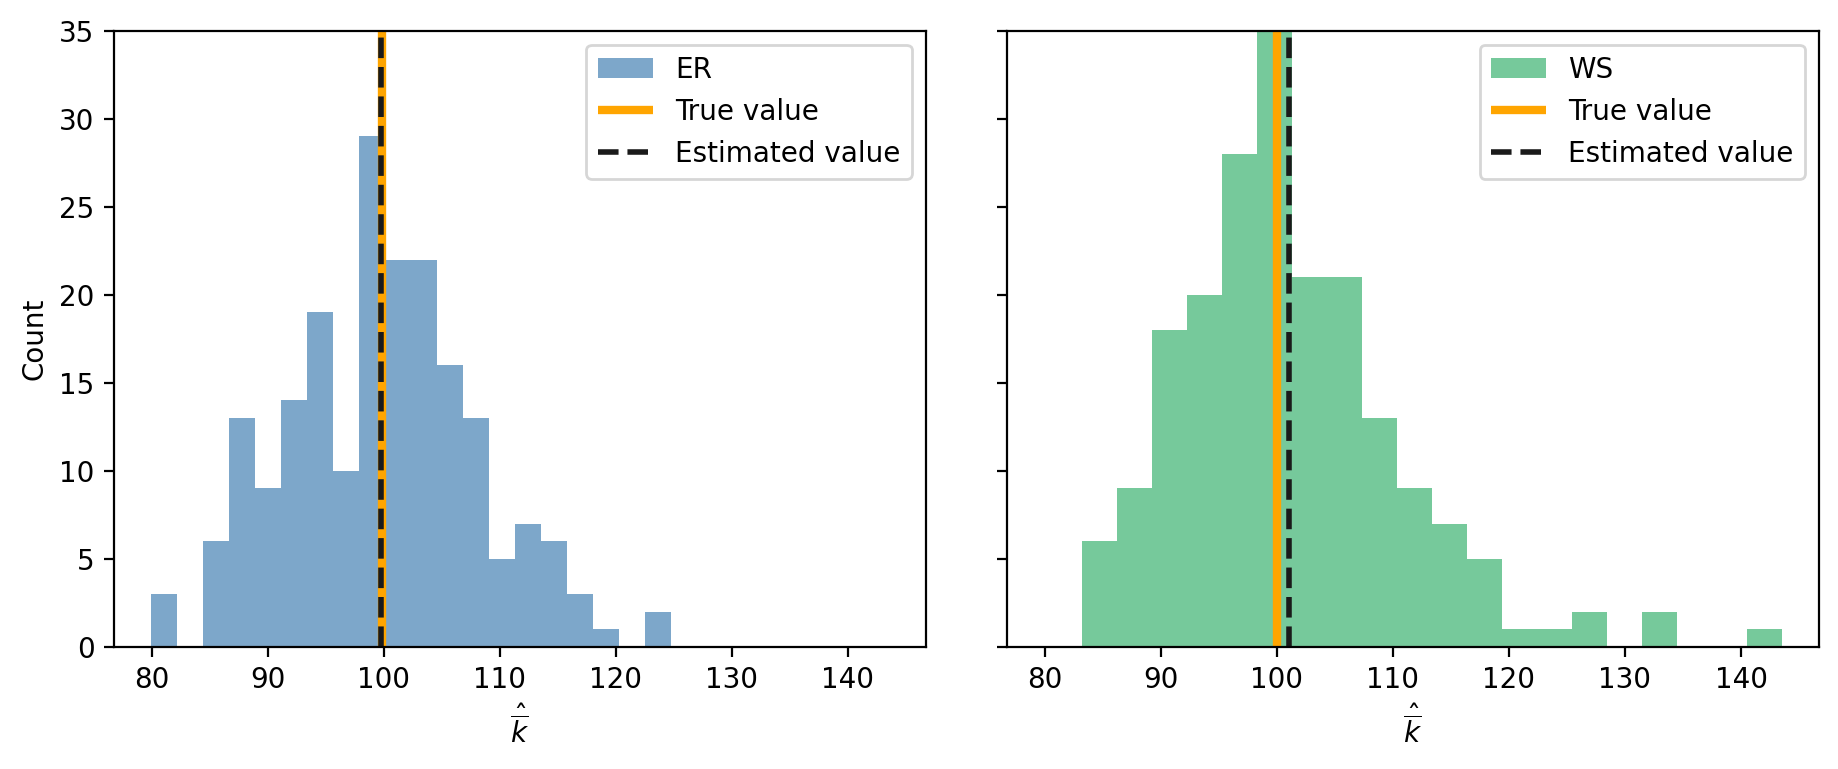

In [29]:
fig, ax = plt.subplots(1,2,figsize=(11,4),dpi=200,sharey=True,sharex=True)
plt.subplots_adjust(wspace=0.1)
    
B = 200 # number of simulations (independent node sampling rounds)
labels = ['ER','WS']
for a, G in enumerate([G_er, G_ws]):
    av_degs = np.zeros(B)
    for b in range(B):
        n = 50
        subg_G = induced_subgraph_sampling(G, n)
        m = subg_G.number_of_edges()
        prob_e = n*(n-1)/N/(N-1)
        M_est = m/prob_e
        av_degs[b] = 2*M_est/N


    ax[a].hist(av_degs, 20, label=labels[a], color=cols[a], ec='.2', alpha=0.7)
    degs_G = np.mean(list(dict(G.degree()).values()))
    ax[a].vlines(degs_G, 0, 35, lw=3, label='True value', color='orange')

    mu = np.mean(av_degs)
    ax[a].vlines(mu, 0, 35, color='.1', lw=2, label='Estimated value', ls='--')
    ax[a].legend()
    ax[a].set_ylim(0,35)
    ax[a].set_xlabel(r'$\hat{\overline{k}}$')

ax[0].set_ylabel('Count')

plt.show()

## Estimating the number of nodes in a graph
The _capture-recapture_ estimator

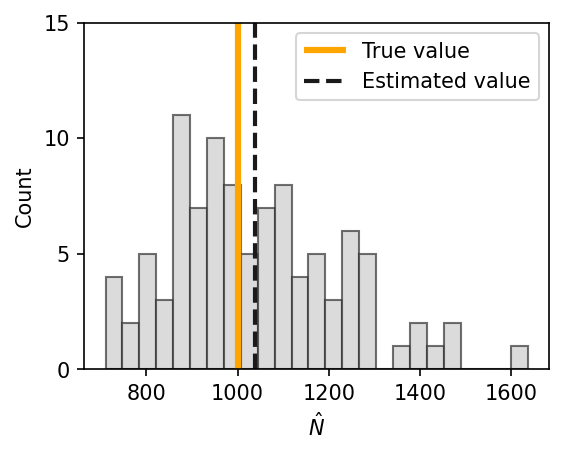

In [33]:
B = 100  # Number of iterations

nodes = list(range(N))  

# Array to store network size estimates
N_est = np.zeros(B)

### Perform capture-recapture simulation
for b in range(B):
    # Randomly sample the size of the first and second sample sets
    n1 = np.random.randint(150, 200)
    n2 = np.random.randint(150, 200)
    
    # Randomly select nodes for the first and second samples
    V_s1 = np.random.choice(nodes, size=n1, replace=False)
    V_s2 = np.random.choice(nodes, size=n2, replace=False)
    
    # Count the number of nodes in the intersection (recaptured nodes)
    n_c = len(set(V_s1).intersection(V_s2))
    
    # Estimate the network size if recaptured nodes exist; otherwise, set to NaN
    N_est[b] = n1 * n2 / n_c if n_c > 0 else np.nan


# Filter out invalid estimates (NaN values)
N_est = N_est[np.isfinite(N_est)]

#################

fig, ax = plt.subplots(1, 1, figsize=(4, 3), dpi=150)
ax.hist(N_est, bins=25, color='.8', edgecolor='.2', alpha=0.7)
ax.vlines(N, 0, 15, linewidth=3, label='True value', color='orange')

mu = np.mean(N_est)
ax.vlines(mu, 0, 15, color='.1', linewidth=2, label='Estimated value', linestyle='--')

ax.legend()
ax.set_yticks(range(0,25,5))
ax.set_ylim(0, 15)
ax.set_xlabel(r'$\hat{N}$')
ax.set_ylabel('Count')

plt.show()

# Edge sampling: Incedent subgraph sampling

In [40]:
from random import shuffle

def incident_subgraph_sampling(G, n, is_directed=False):
    """
    Samples an incident subgraph containing `n` edges from the input graph `G`.
    
    Parameters
    ----------
    G : networkx.Graph or networkx.DiGraph
        The input graph from which the subgraph is sampled.
    n : int
        The number of edges to include in the sampled incident subgraph.
    is_directed : bool, optional (default=False)
        Specifies if the graph is directed. If True, edges are treated as directed.
        
    Returns
    -------
    subgraph : networkx.Graph or networkx.DiGraph
        The incident subgraph with `n` edges and the nodes connected by those edges.
        
    Raises
    ------
    ValueError
        If `n` is larger than the number of edges in the graph.
    """
    # Ensure `n` is not larger than the number of edges in G
    if n > G.number_of_edges():
        raise ValueError("`n` must be less than or equal to the number of edges in the graph.")
    
    # Get the list of edges in the graph
    edges = list(G.edges())
    
    # Shuffle the edges randomly to sample from them
    shuffle(edges)
    
    # Select the first `n` edges from the shuffled list
    sampled_edges = edges[:n]
    
    # Find the unique nodes connected by the sampled edges
    sampled_nodes = set(node for edge in sampled_edges for node in edge)
    
    # Create a new subgraph with the sampled nodes and edges
    subgraph = G.edge_subgraph(sampled_edges).copy()
    
    return subgraph

## Estimating fractions of nodes belonging to two groups in Albert-Barabasi graph

In [35]:
N = 1000
G = nx.barabasi_albert_graph(N,10)
pos = nx.spring_layout(G)
print("Average degree: %1.1f" % np.mean(list(dict(G.degree()).values())))
M = G.number_of_edges()
print("Number of edges:", M)

Average degree: 19.8
Number of edges: 9900


In [36]:
prob_red = 0.7
reds = 0
blues = 0
for node in G.nodes():
    G.nodes[node]['team'] = 'red' if np.random.rand() < prob_red else 'blue'
    if G.nodes[node]['team'] == 'red':
        reds += 1
    else:
        blues += 1
        
print("Number of red nodes:",reds)
print("Number of blue nodes:",blues)

Number of red nodes: 713
Number of blue nodes: 287


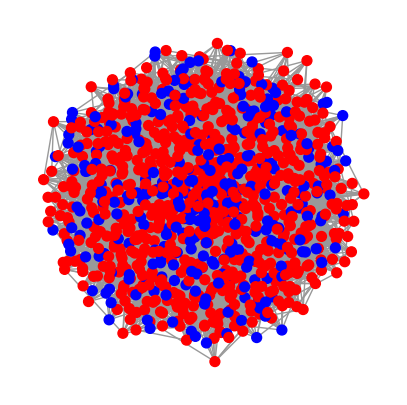

In [37]:
fig, ax = plt.subplots(1,1,figsize=(5,5),dpi=100)
nx.draw(G, pos=pos, node_color=nx.get_node_attributes(G, 'team').values(),ax=ax,node_size=50, edge_color='.6')
plt.show()

### Estimate fractions of node colors from sample

In [38]:
from scipy.special import binom

def prob_i(N_e, k_i, n):
    """
    Calculate the probability of at least one sample overlapping with node i.

    Parameters:
    N_e : int
        Effective size of the network.
    k_i : int
        Number of samples that do not include node i.
    n : int
        Number of nodes in the sample.

    Returns:
    float
        Probability of at least one sample overlapping with node i.
    """
    # If the sample size exceeds the available nodes excluding k_i, 
    # the probability is 1 (certain inclusion).
    if n > N_e - k_i:
        return 1.0
    
    # Otherwise, calculate the complement of the probability that node i is not sampled.
    return 1.0 - binom(N_e - k_i, n) / binom(N_e, n)

In [41]:
# We use the Horovitz-Thompson estimator to get those numbers from sampled graphs
B = 1000
reds_est = [None]*B
blues_est = [None]*B
degrees = dict(G.degree())

for b in range(B):
    n = 100
    G_s = incident_subgraph_sampling(G,n)
    V_s = list(G_s.nodes())
    E_s = list(G_s.edges())
    pi = {node: prob_i(M,degrees[node],n)  for node in V_s}
    reds_est[b] = sum([ 1.0/pi[node] for node in V_s if G.nodes[node]['team'] == 'red'])
    blues_est[b] = sum([ 1.0/pi[node] for node in V_s if G.nodes[node]['team'] == 'blue'])

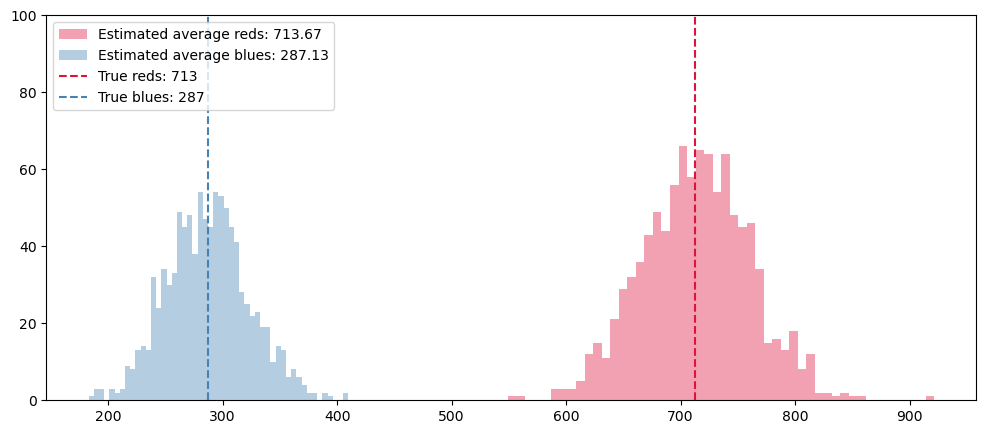

In [84]:
fig, ax = plt.subplots(1,1,figsize=(12,5),dpi=100)

ax.hist(reds_est, bins=50, color='crimson', alpha=0.4, label='Estimated average reds: %.2f'%(np.mean(reds_est)))
ax.hist(blues_est, bins=50, color='steelblue', alpha=0.4, label='Estimated average blues: %.2f'%(np.mean(blues_est)))

ax.vlines(reds, 0, 100, color='crimson', ls='--', label='True reds: %i'%reds)
ax.vlines(blues, 0, 100, color='steelblue', ls='--', label='True blues: %i'%blues)

ax.legend(loc=2)
ax.set_ylim(0,100)

plt.show()

## Estimate degree distribution

### Helper function for calculating binned distribution

In [43]:
def get_binning(data, num_bins=50, is_pmf=False, log_binning=False, threshold=0):
    """
    Bins the input data and calculates the probability mass function (PMF) or 
    probability density function (PDF) over the bins. Supports both linear and 
    logarithmic binning.

    Parameters
    ----------
    data : array-like
        The data to be binned, typically a list or numpy array of values.
    num_bins : int, optional
        The number of bins to use for binning the data (default is 15).
    is_pmf : bool, optional
        If True, computes the probability mass function (PMF) by normalizing 
        histogram counts to sum to 1. If False, computes the probability density 
        function (PDF) by normalizing the density of the bins (default is True).
    log_binning : bool, optional
        If True, uses logarithmic binning with log-spaced bins. If False, uses 
        linear binning (default is False).
    threshold : float, optional
        Only values greater than `threshold` will be included in the binning, 
        allowing for the removal of isolated nodes or outliers (default is 0).
    
    Returns
    -------
    x : numpy.ndarray
        The bin centers, adjusted to be the midpoint of each bin.
    p : numpy.ndarray
        The computed PMF or PDF values for each bin.
    
    Notes
    -----
    This function removes values below a specified threshold, then defines 
    bin edges based on the specified binning method (linear or logarithmic). 
    It calculates either the PMF or PDF based on `is_pmf`.
    """
    
    # Filter out isolated nodes or low values by removing data below threshold
    values = list(filter(lambda x: x > threshold, data))
    if len(values) != len(data):
        print("%s isolated nodes have been removed" % (len(data) - len(values)))

    # Define the range for binning (support of the distribution)
    lower_bound = min(values)
    upper_bound = max(values)

    # Define bin edges based on binning type (logarithmic or linear)
    if log_binning:
        # Use log-spaced bins by taking the log of the bounds
        lower_bound = np.log10(lower_bound)
        upper_bound = np.log10(upper_bound)
        bin_edges = np.logspace(lower_bound, upper_bound, num_bins + 1, base=10)
    else:
        # Use linearly spaced bins
        bin_edges = np.linspace(lower_bound, upper_bound, num_bins + 1)

    # Calculate histogram based on chosen binning method
    if is_pmf:
        # Calculate PMF: normalized counts of data in each bin
        y, _ = np.histogram(values, bins=bin_edges, density=False)
        p = y / y.sum()  # Normalize to get probabilities
    else:
        # Calculate PDF: normalized density of data in each bin
        p, _ = np.histogram(values, bins=bin_edges, density=True)

    # Compute bin centers (midpoints) to represent each bin
    x = bin_edges[1:] - np.diff(bin_edges) / 2  # Bin centers for plotting

    # Remove bins with zero probability to avoid plotting/display issues
    x = x[p > 0]
    p = p[p > 0]

    return x, p

In [85]:
### Simulate microcanonical ER model

In [44]:
M = 50000
N = 10000
G = nx.gnm_random_graph(N,M)
degrees = list(dict(G.degree()).values())
print("Average degree: %1.3f" % np.mean(degrees))
n = 5000

Average degree: 10.000


In [45]:
# Using Incident subgraph Sampling
G_incid = incident_subgraph_sampling(G, n)
degrees_incid = list(dict(G_incid.degree()).values())
x_incid,y_incid = get_binning(degrees_incid, log_binning=True)

In [46]:
# True Degree distribution
x_true,y_true = get_binning(degrees, log_binning=True)

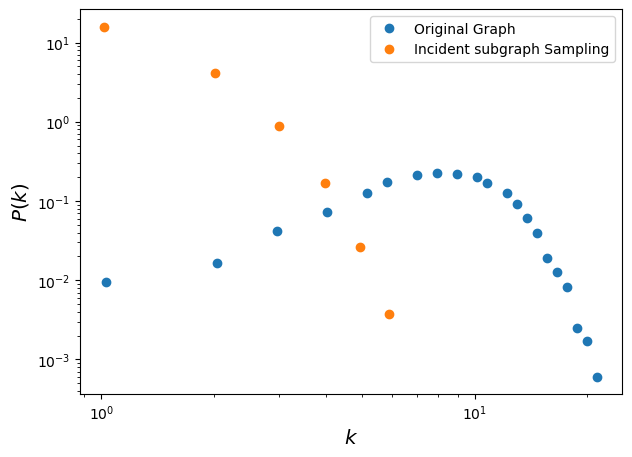

In [48]:
fig, ax = plt.subplots(1,1,figsize=(7,5),dpi=100)
ax.loglog(x_true,y_true,'o', label='Original Graph')
ax.loglog(x_incid, y_incid, 'o', label='Incident subgraph Sampling')
ax.legend()
ax.set_xlabel(r'$k$',fontsize='x-large')
ax.set_ylabel(r'$P(k)$',fontsize='x-large')

plt.show()

# Edge Sampling with Graph Induction (ES-i)

In [49]:
def edge_sampling_with_induction(G, n):
    """
    Perform edge sampling with induction and return a new graph.

    Parameters:
    G : networkx.Graph
        Input graph.
    n : int
        Number of edges to sample initially.

    Returns:
    networkx.Graph
        A new graph induced by the sampled nodes and edges.
    """
    # Get all edges and total number of edges in the graph
    edges = list(G.edges())
    M = G.number_of_edges()
    
    # Sample n edges randomly without replacement
    sampled_edges = set([edges[i] for i in np.random.permutation(M)[:n]])
    
    # Extract the set of nodes in the sampled edges
    nodes_from_sampled_edges = set(node for edge in sampled_edges for node in edge)
    
    # Induce edges between the sampled nodes
    induced_edges = set(sampled_edges)
    for node_i, node_j in edges:
        if node_i in nodes_from_sampled_edges and node_j in nodes_from_sampled_edges:
            induced_edges.add((node_i, node_j))
    
    # Create a new graph with the sampled nodes and induced edges
    new_graph = nx.Graph()
    new_graph.add_nodes_from(nodes_from_sampled_edges)
    new_graph.add_edges_from(induced_edges)
    
    return new_graph

In [50]:
G_esi = edge_sampling_with_induction(G, n)
degrees_esi = list(dict(G_esi.degree()).values())
x_esi,y_esi = get_binning(degrees_esi, log_binning=True)

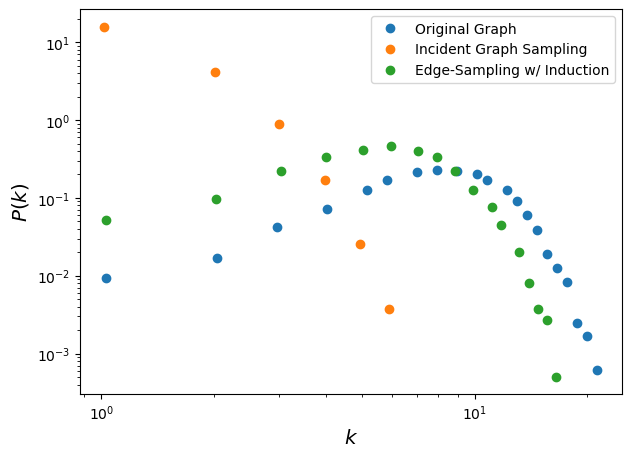

In [51]:
fig, ax = plt.subplots(1,1,figsize=(7,5),dpi=100)
ax.loglog(x_true, y_true, 'o', label='Original Graph')
ax.loglog(x_incid, y_incid, 'o', label='Incident Graph Sampling')
ax.loglog(x_esi, y_esi, 'o', label='Edge-Sampling w/ Induction')
ax.legend()
ax.set_xlabel(r'$k$',fontsize='x-large')
ax.set_ylabel(r'$P(k)$',fontsize='x-large')


plt.show()

## Quantitative comparison of degree distributions using the Kolmogorov-Smirnov (KS) statistic

In [86]:
from scipy.stats import ks_2samp

def ks_d(values1, values2):
    """
    Compute the Kolmogorov-Smirnov (KS) statistic to compare two distributions.

    Parameters:
    values1 : array-like
        First sample of values.
    values2 : array-like
        Second sample of values.

    Returns:
    float
        KS statistic (D), representing the maximum distance between the empirical 
        cumulative distribution functions (ECDFs) of the two samples.
    """
    D, _ = ks_2samp(values1, values2)
    return D

In [87]:
print('Original vs ES-i:', ks_d(degrees, degrees_esi))
print('Original vs Incident Graph Sampling:', ks_d(degrees, degrees_incid))

Original vs ES-i: 0.13735953319665667
Original vs Incident Graph Sampling: 0.9946270543615676


# Snowball Sampling

In [54]:
def snowball_sampling(G, seed_nodes, n_waves=2):
    """
    Perform snowball sampling on a graph.

    Parameters:
    G : networkx.Graph or networkx.DiGraph
        Input graph.
    seed_nodes : list or set
        Initial set of nodes to start the snowball sampling.
    n_waves : int, optional
        Number of waves to expand the snowball sampling (default is 2).

    Returns:
    networkx.Graph or networkx.DiGraph
        A new graph G_s containing the sampled nodes and edges.
    """
    # Initialize sets to keep track of sampled nodes and edges
    V_s = set(seed_nodes)
    E_s = set()
    
    # Initialize the wave structure
    V = [set()] * (n_waves + 1)
    V[0] = set(seed_nodes)
    
    # Perform snowball sampling over the specified number of waves
    for k in range(n_waves):
        V[k + 1] = set()  # Initialize the next wave
        for node_i in V[k]:
            for node_j in G.neighbors(node_i):
                # Add the edge to the sampled edge set
                edge = (node_i, node_j) if not G.is_directed() and node_i < node_j else (node_i, node_j)
                E_s.add(edge)
                
                # Add the neighboring node to the next wave
                V[k + 1].add(node_j)
        
        # Exclude nodes already in the sampled set
        V[k + 1] -= V_s
        
        # Add new nodes to the sampled set
        V_s.update(V[k + 1])
    
    # Create the new sampled graph
    G_s = G.subgraph(V_s).copy()
    return G_s

In [88]:
## Snowball sampling of BA graph

In [55]:
N = 15000
m = 3
G = nx.barabasi_albert_graph(N, m)
M = G.number_of_nodes()
degrees = list(dict(G.degree()).values())
print(M)

15000


Number of waves: 0 | Number of nodes discovered: 50 | Number of edges discovered: 0
Number of waves: 1 | Number of nodes discovered: 284 | Number of edges discovered: 311
Number of waves: 2 | Number of nodes discovered: 3564 | Number of edges discovered: 7486
Number of waves: 3 | Number of nodes discovered: 12994 | Number of edges discovered: 38000
Number of waves: 4 | Number of nodes discovered: 15000 | Number of edges discovered: 44991
Number of waves: 5 | Number of nodes discovered: 15000 | Number of edges discovered: 44991


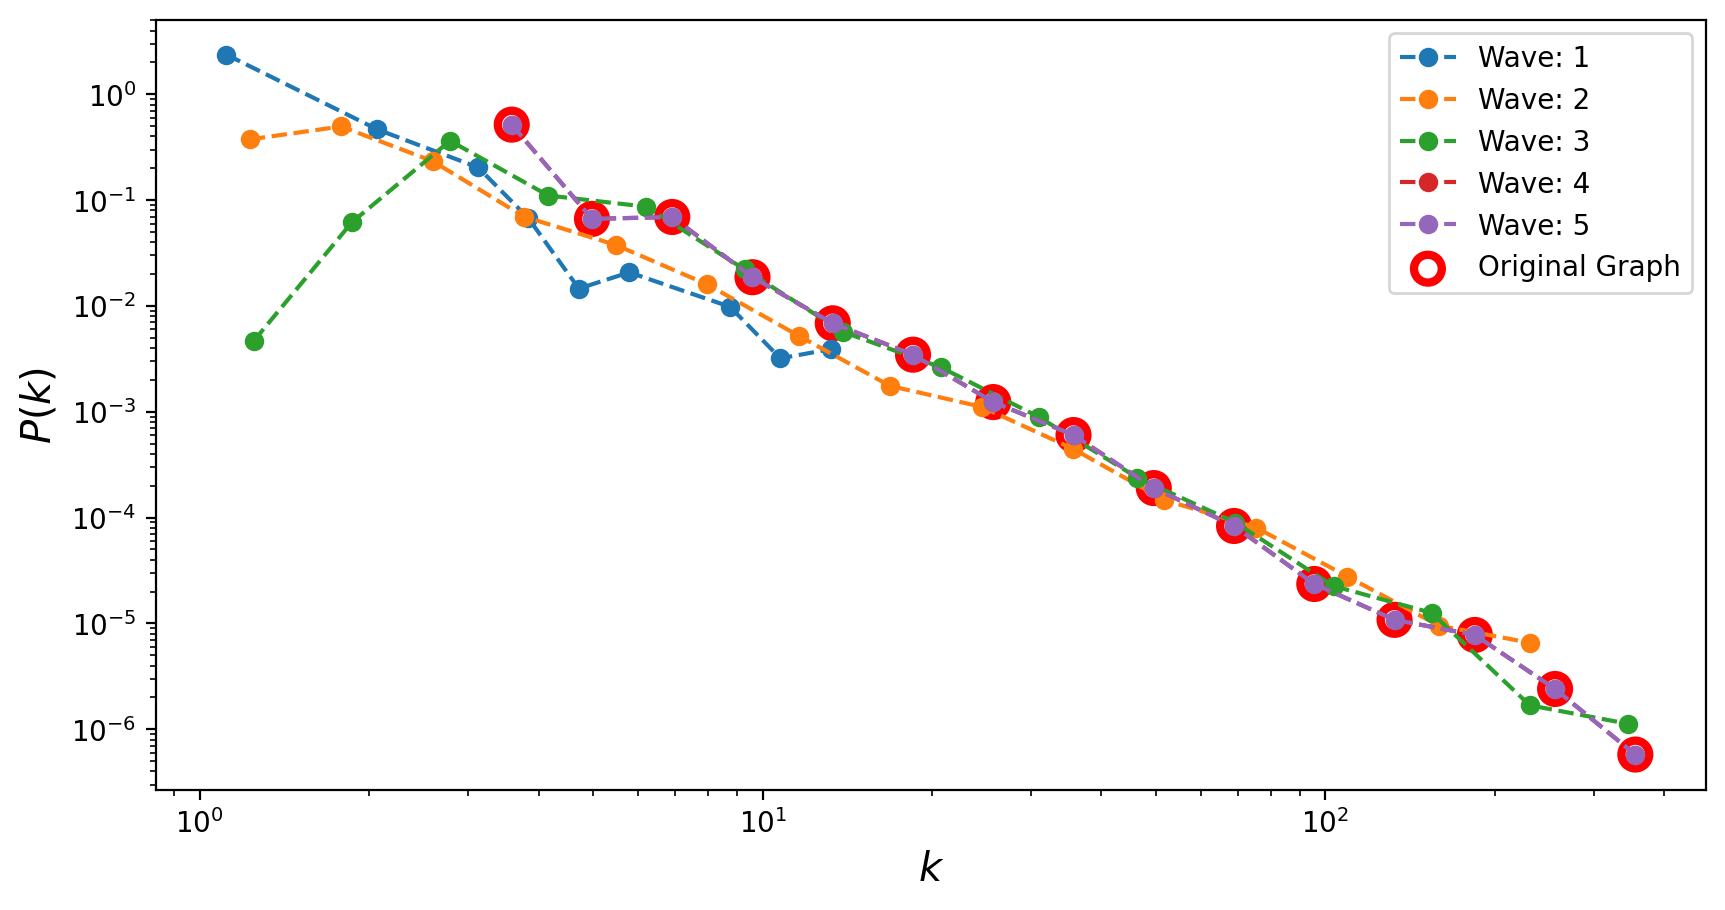

In [56]:
fig, ax = plt.subplots(1,1,figsize=(10, 5), dpi=200)

n = 50  # Number of seed nodes
n_waves = 5  # Maximum number of waves
degrees_sampled = [None] * (n_waves + 1)

nodes = list(G.nodes())

# Perform snowball sampling for increasing numbers of waves
for k in range(n_waves + 1):
    # Select seed nodes randomly
    seed_nodes = set(np.random.choice(nodes, size=n, replace=False))
    
    # Perform snowball sampling
    G_s = snowball_sampling(G, seed_nodes, n_waves=k)
    
    # Print summary of the sampled graph
    print(f"Number of waves: {k} | Number of nodes discovered: {G_s.number_of_nodes()} | "
          f"Number of edges discovered: {G_s.number_of_edges()}")
    
    # Get degree distribution of the sampled graph
    degrees_sampled[k] = [deg for _, deg in G_s.degree()]
    
    # Plot degree distribution for the current wave
    if k > 0:
        x1, y1 = get_binning(degrees_sampled[k], log_binning=True, num_bins=15, is_pmf=False)
        ax.loglog(x1, y1, '--o', label=f'Wave: {k}')

# Plot the degree distribution of the original graph
x, y = get_binning(degrees, log_binning=True, num_bins=15, is_pmf=False)
ax.scatter(x, y, s=100, facecolors='none', edgecolors='r', lw=3, label='Original Graph')

ax.legend()
ax.set_xlabel(r'$k$',fontsize='x-large')
ax.set_ylabel(r'$P(k)$',fontsize='x-large')


plt.show()

# Traceroute sampling

In [58]:
def traceroute_sampling(G, n_sources=5, n_targets=50):
    """
    Perform traceroute sampling on a graph, selecting multiple sources and targets.

    Parameters:
    G : networkx.Graph
        Input graph.
    n_sources : int, optional
        Number of source nodes (default is 5).
    n_targets : int, optional
        Number of target nodes (default is 50).

    Returns:
    networkx.Graph
        A new graph containing the sampled nodes and edges.
    """
    nodes = list(G.nodes())
    shuffle(nodes)

    # Select sources and targets
    sources = set(nodes[:n_sources])
    targets = set(nodes[n_sources:n_sources + n_targets])

    # Initialize the sampled graph
    G_s = nx.Graph() if not G.is_directed() else nx.DiGraph()

    # Compute shortest paths from each source to each target
    for source_node in sources:
        for target_node in targets:
            try:
                path = nx.shortest_path(G, source=source_node, target=target_node)
                G_s.add_nodes_from(path)
                G_s.add_edges_from((path[i], path[i + 1]) for i in range(len(path) - 1))
            except nx.NetworkXNoPath:
                pass  # Ignore if no path exists

    return G_s

In [59]:
# Using Incident Graph Sampling
G_tr = traceroute_sampling(G, n)
degrees_tr = list(dict(G_tr.degree()).values())
x_tr,y_tr = get_binning(degrees_tr, log_binning=True)

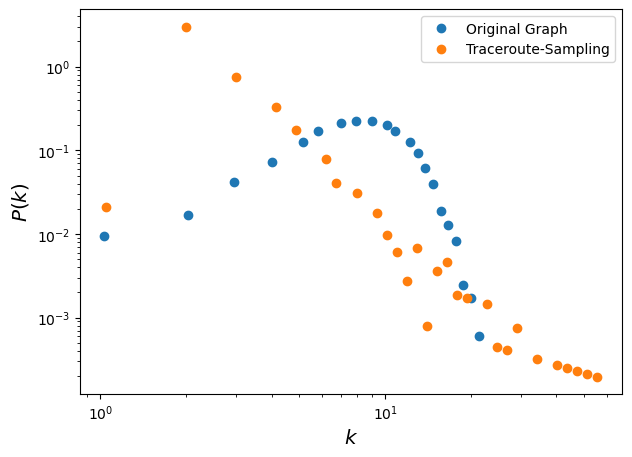

In [61]:
fig, ax = plt.subplots(1,1,figsize=(7,5),dpi=100)
ax.loglog(x_true, y_true, 'o', label='Original Graph')
# ax.loglog(x_incid, y_incid, 'o', label='Incident Graph Sampling')
# ax.loglog(x_esi, y_esi, 'o', label='Edge-Sampling w/ Induction')
ax.loglog(x_tr, y_tr, 'o', label='Traceroute-Sampling')
ax.legend()
ax.set_xlabel(r'$k$',fontsize='x-large')
ax.set_ylabel(r'$P(k)$',fontsize='x-large')


plt.show()

In [89]:
# Graph parameters
N = 1000
k = 15.0
M = int(0.5 * N * k)
G = nx.gnm_random_graph(N, M)
degrees = [deg for _, deg in G.degree()]  # Original degree distribution

# Traceroute sampling parameters
n_sources = 8
share_nodes = []
share_edges = []
sampled_degrees = []
sampled_clustering = []
N_targets = np.arange(50, 261, 50)

# Perform traceroute sampling for different numbers of targets
for n_targets in N_targets:
    sampled_graph = traceroute_sampling(G, n_sources, n_targets)  # Updated function returns the graph directly

    # Compute metrics
    share_nodes.append(sampled_graph.number_of_nodes() / float(N))
    share_edges.append(sampled_graph.number_of_edges() / float(M))
    sampled_degrees.append([deg for _, deg in sampled_graph.degree()])
    sampled_clustering.append(list(nx.clustering(sampled_graph).values()))

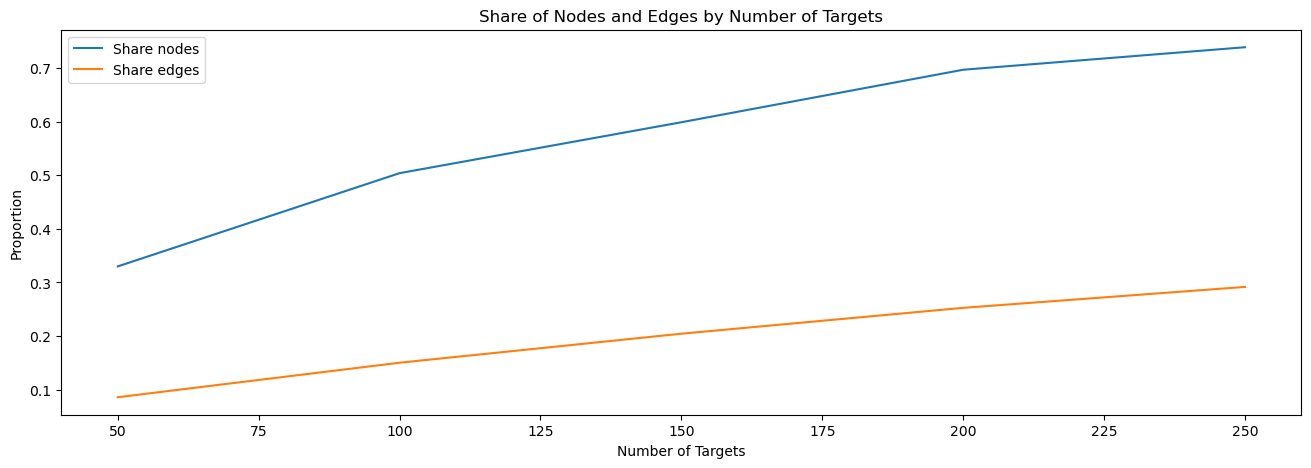

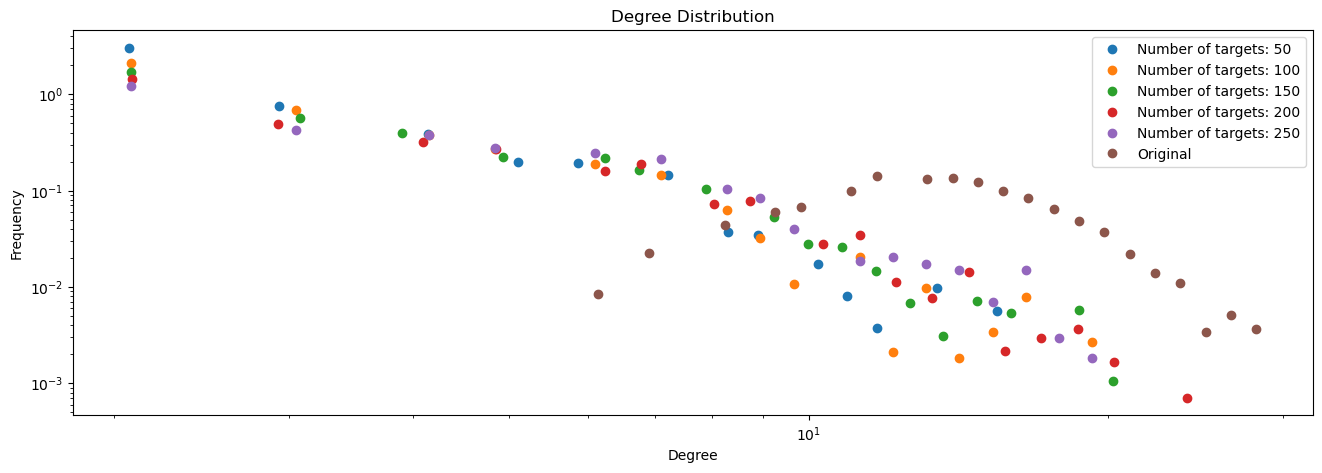

In [90]:
# Plot share of nodes and edges
plt.figure(figsize=(16, 5))
plt.plot(N_targets, share_nodes, label='Share nodes')
plt.plot(N_targets, share_edges, label='Share edges')
plt.xlabel("Number of Targets")
plt.ylabel("Proportion")
plt.legend()
plt.title("Share of Nodes and Edges by Number of Targets")
plt.show()

# Plot degree distributions
plt.figure(figsize=(16, 5))
for k, values in enumerate(sampled_degrees):
    x, y = get_binning(values, log_binning=True, num_bins=30)
    plt.loglog(x, y, 'o', label=f"Number of targets: {N_targets[k]}")

# Plot original degree distribution
x, y = get_binning(degrees, log_binning=True, num_bins=30)
plt.loglog(x, y, 'o', label="Original")

plt.xlabel("Degree")
plt.ylabel("Frequency")
plt.legend()
plt.title("Degree Distribution")
plt.show()

## Bias reduction

In [63]:
def traceroute_sampling_revised(G, source_node, n_targets=50):
    """
    Perform traceroute sampling from a single source to multiple targets.

    Parameters:
    G : networkx.Graph
        Input graph.
    source_node : node
        Source node to start the traceroute.
    n_targets : int, optional
        Number of target nodes (default is 50).

    Returns:
    networkx.Graph
        A new graph containing the sampled nodes and edges.
    """
    nodes = list(G.nodes())

    # Remove the source node from the list of potential targets
    nodes.remove(source_node)
    shuffle(nodes)

    # Select targets
    targets = set(nodes[:n_targets])

    # Initialize the sampled graph
    G_s = nx.Graph() if not G.is_directed() else nx.DiGraph()

    # Compute shortest paths from the source to each target
    for target_node in targets:
        try:
            path = nx.shortest_path(G, source=source_node, target=target_node)
            G_s.add_nodes_from(path)
            G_s.add_edges_from((path[i], path[i + 1]) for i in range(len(path) - 1))
        except nx.NetworkXNoPath:
            pass  # Ignore if no path exists

    return G_s

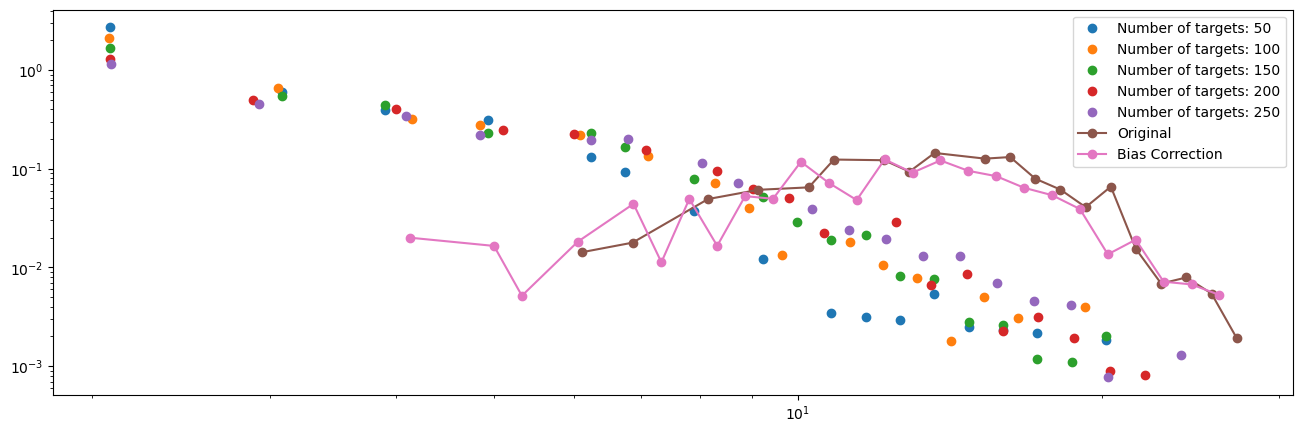

In [66]:
from collections import defaultdict
from itertools import combinations

# Parameters
n_sources = 8
n_targets = 100
B = 200
degree = defaultdict(list)

# Run sampling iterations
for b in range(B):
#     print(f"Iteration {b + 1}/{B}")

    # Shuffle and select source nodes
    nodes = list(G.nodes())
    np.random.shuffle(nodes)
    source_nodes = nodes[:n_sources]

    # Perform traceroute sampling for each source node
    sampled_graphs = [traceroute_sampling_revised(G, source_node, n_targets) for source_node in source_nodes]

    # Generate all pairs of sampled graphs
    pairs = combinations(sampled_graphs, 2)

    for sampled_graph1, sampled_graph2 in pairs:
        for u in sampled_graph1.nodes:
            # Get neighbors in both sampled graphs
            neigh1 = set(sampled_graph1.neighbors(u))
            if u in sampled_graph2:
                neigh2 = set(sampled_graph2.neighbors(u))
                # Compute the degree estimation based on shared neighbors
                N_c = float(len(neigh1.intersection(neigh2)))
                if N_c > 2:
                    degree[u].append(len(neigh1) * len(neigh2) / N_c)

# Compute degree estimates
degree_est = [np.median(values) for values in degree.values()]

# Plotting
plt.figure(figsize=(16, 5))

for k, values in enumerate(sampled_degrees):
    x,y = get_binning(values, log_binning=True, num_bins=30)
    __ = plt.loglog(x,y, 'o', label = "Number of targets: %d" % N_targets[k])

# Original degree distribution
x, y = get_binning(degrees, log_binning=True, num_bins=30)
plt.loglog(x, y, '-o', label="Original")

# Bias-corrected degree estimates
x, y = get_binning(degree_est, log_binning=True, num_bins=30)
plt.loglog(x, y, '-o', label="Bias Correction")

plt.legend()
plt.show()

# Random Walk Sampling


In [67]:
def random_walk_sampling(G, n, n0=10, fly_back=0.15, jump_after=10):
    """
    Perform random walk sampling on a graph.

    Parameters:
    G : networkx.Graph
        Input graph.
    n : int
        Target number of nodes to sample.
    n0 : int, optional
        Number of initial walkers (default is 10).
    fly_back : float, optional
        Probability of flying back to the starting node (default is 0.15).
    jump_after : int, optional
        Number of consecutive steps stuck before restarting (default is 10).

    Returns:
    networkx.Graph
        A new graph G_s containing the sampled nodes and edges.
    """
    # Initialize sampled nodes and edges
    nodes = list(G.nodes())
    shuffle(nodes)
    V0 = nodes[:n0]  # Initial walker positions
    V_s = set(V0)
    E_s = set()
    
    # State variables for each walker
    current_position = V0[:]
    prev_position = [-1] * n0
    stuck = [0] * n0

    for k in range(n0):
        while len(V_s) < n:
            # Check if walker is stuck
            if current_position[k] == prev_position[k]:
                stuck[k] += 1
            if stuck[k] > jump_after:
                shuffle(nodes)
                current_position[k] = nodes[0]
                stuck[k] = 0

            # Select a random neighbor for the next step
            neighbors = list(G.neighbors(current_position[k]))
            if not neighbors:  # Handle isolated nodes
                continue
            shuffle(neighbors)
            
            # Update positions
            prev_position[k] = current_position[k]
            current_position[k] = neighbors[0]

            # Add the new node and edge to the sampled set
            V_s.add(current_position[k])
            edge = (current_position[k], prev_position[k]) if current_position[k] > prev_position[k] \
                else (prev_position[k], current_position[k])
            E_s.add(edge)

            # Fly back to the starting node with a given probability
            if np.random.rand() <= fly_back:
                current_position[k] = V0[k]

    # Create the new sampled graph
    G_s = nx.Graph() if not G.is_directed() else nx.DiGraph()
    G_s.add_nodes_from(V_s)
    G_s.add_edges_from(E_s)

    return G_s

In [68]:
N = 10000
G = nx.barabasi_albert_graph(N,5)
M = G.number_of_edges()
degrees = list(dict(G.degree()).values())
clustering = list(nx.clustering(G).values())

8 isolated nodes have been removed
9 isolated nodes have been removed
9 isolated nodes have been removed
7 isolated nodes have been removed
9 isolated nodes have been removed


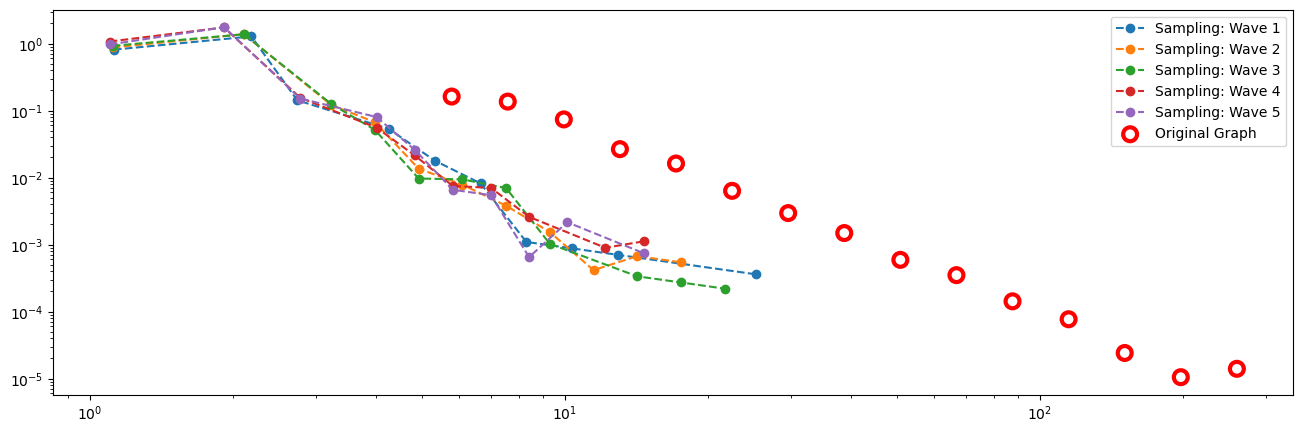

In [101]:
plt.figure(figsize=(16, 5))
n = 1000  # Target sample size
n0 = 10  # Number of walkers
fly_back = 0.15
jump_after = 10

degrees_sampled = []

for k in range(1, 6):  # Number of waves or attempts
    G_s = random_walk_sampling(G, n=n, n0=n0, fly_back=fly_back, jump_after=jump_after)
    degrees_sampled.append([deg for _, deg in G_s.degree()])
    x, y = get_binning(degrees_sampled[-1], log_binning=True, num_bins=15, is_pmf=False)
    __ = plt.loglog(x, y, '--o', label=f'Sampling: Wave {k}')

# Original graph degree distribution
degrees = [deg for _, deg in G.degree()]
x, y = get_binning(degrees, log_binning=True, num_bins=15, is_pmf=False)
__ = plt.scatter(x, y, s=100, facecolors='none', edgecolors='r', lw=3, label='Original Graph')

plt.legend()
plt.show()

## Metropolis-Hastings RW sampling

In [70]:
def metropolis_hastings_random_walk_sampling(G, n, n0=10, fly_back=0.0, jump_after=10):
    """
    Perform Metropolis-Hastings random walk sampling on a graph.

    Parameters:
    G : networkx.Graph
        Input graph.
    n : int
        Target number of nodes to sample.
    n0 : int, optional
        Number of initial walkers (default is 10).
    fly_back : float, optional
        Probability of flying back to the starting node (default is 0.0).
    jump_after : int, optional
        Number of consecutive steps stuck before restarting (default is 10).

    Returns:
    networkx.Graph
        A new graph G_s containing the sampled nodes and edges.
    """
    # Initialize sampled nodes and edges
    nodes = list(G.nodes())
    shuffle(nodes)
    degrees = dict(G.degree())
    
    V0 = nodes[:n0]  # Initial walker positions
    V_s = set(V0)
    E_s = set()
    
    # State variables for each walker
    current_position = V0[:]
    prev_position = [-1] * n0
    stuck = [0] * n0
    
    while len(V_s) < n:
        for k in range(n0):
            # Check if walker is stuck
            if current_position[k] == prev_position[k]:
                stuck[k] += 1
            if stuck[k] > jump_after:
                shuffle(nodes)
                current_position[k] = nodes[0]
                stuck[k] = 0

            # Select a random neighbor
            neighbors = list(G.neighbors(current_position[k]))
            if not neighbors:  # Handle isolated nodes
                continue
            shuffle(neighbors)
            
            # Metropolis-Hastings condition
            r = np.random.rand()
            condition = degrees[current_position[k]] / float(degrees[neighbors[0]])
            
            if r <= condition:
                prev_position[k] = current_position[k]
                current_position[k] = neighbors[0]
                V_s.add(current_position[k])
                edge = (current_position[k], prev_position[k]) if current_position[k] >= prev_position[k] \
                    else (prev_position[k], current_position[k])
                E_s.add(edge)

                # Fly back to the starting node with a given probability
                if np.random.rand() < fly_back:
                    current_position[k] = V0[k]
            
            if len(V_s) >= n:
                break
        
        if len(V_s) >= n:
            break

    # Create the new sampled graph
    G_s = nx.Graph() if not G.is_directed() else nx.DiGraph()
    G_s.add_nodes_from(V_s)
    G_s.add_edges_from(E_s)

    return G_s

In [92]:
N = 10000
G = nx.barabasi_albert_graph(N,5)
M = G.number_of_edges()
degrees = list(dict(G.degree()).values())
clustering = list(nx.clustering(G).values())

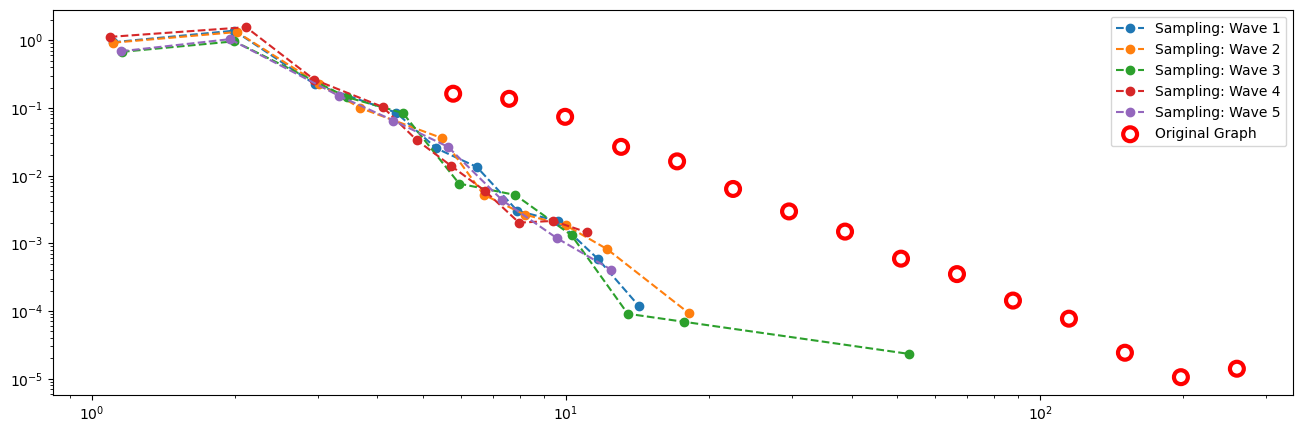

In [102]:
plt.figure(figsize=(16, 5))
n = 3000  # Target sample size
n0 = 10  # Number of walkers
fly_back = 0.15
jump_after = 10

degrees_sampled = []

for k in range(1, 6):  # Number of waves or attempts
    G_s = metropolis_hastings_random_walk_sampling(G, n=n, n0=n0, fly_back=fly_back, jump_after=jump_after)
    degrees_sampled.append([deg for _, deg in G_s.degree()])
    x, y = get_binning(degrees_sampled[-1], log_binning=True, num_bins=15, is_pmf=False)
    __ = plt.loglog(x, y, '--o', label=f'Sampling: Wave {k}')

# Original graph degree distribution
degrees = [deg for _, deg in G.degree()]
x, y = get_binning(degrees, log_binning=True, num_bins=15, is_pmf=False)
__ = plt.scatter(x, y, s=100, facecolors='none', edgecolors='r', lw=3, label='Original Graph')

plt.legend()
plt.show()

# Comparing different sampling algorithms

In [73]:
sampling_designs = ['induced_subgraph_sampling',
                    'incident_subgraph_sampling',
                    'edge_sampling_with_induction',
#                     'labeled_star_sampling',
                    'snowball_sampling',
                    'traceroute_sampling',
                    'random_walk_sampling', 
                    'metropolis_hastings_random_walk_sampling']
sampling_edges = ['incident_subgraph_sampling',
                  'edge_sampling_with_induction']

In [75]:
data_label = 'BA graph'
graph = G
graph.remove_edges_from(nx.selfloop_edges(graph))

In [76]:
N = graph.number_of_nodes()
M = graph.number_of_edges()
print("Number of nodes: %d" % N)
print("Number of edges: %d" % M)

Number of nodes: 10000
Number of edges: 49975


In [77]:
degrees = list(dict(graph.degree()).values())
clustering = list(nx.clustering(graph).values())

In [78]:
coverage = 0.1
n_v = int(N*coverage)
n_e = int(M*coverage/2.5)
snowball_v0 = 5
n_waves = 2
n_sources = 60
n_targets = 1000
n_labeled_star = int(N*coverage/2.6)

In [79]:
B = 5  # Number of bootstrap iterations
stats = dict()

# Ensure sampling_designs contains the relevant sampling functions
for sampling_label in sampling_designs:
    sampling = eval(sampling_label)  # Get the function by its name
    print('\n', sampling_label)

    # Initialize statistics
    share_nodes = 0.0
    share_edges = 0.0
    ks_degree = 0.0
    ks_clustering = 0.0

    for b in range(B):
        print(f"Iteration {b + 1}/{B}")

        # Perform sampling and generate the sampled graph
        if sampling_label in sampling_edges:
            sampled_graph = sampling(graph, n_e)  # Outputs a graph
        elif sampling_label == 'labeled_star_sampling':
            sampled_graph = sampling(graph, n_labeled_star)
        elif sampling_label == 'traceroute_sampling':
            sampled_graph = sampling(graph, n_sources, n_targets)
        elif sampling_label == 'snowball_sampling':
            snowball_v1 = np.random.choice(list(graph.nodes()),size=snowball_v0, replace=False)
            sampled_graph = sampling(graph, snowball_v1, n_waves)
        else:
            sampled_graph = sampling(graph, n_v)

        # Calculate metrics
        share_nodes += sampled_graph.number_of_nodes() / float(N) / float(B)
        share_edges += sampled_graph.number_of_edges() / float(M) / float(B)

        # Degree and clustering metrics
        degrees_s = [deg for _, deg in sampled_graph.degree()]
        clustering_s = list(nx.clustering(sampled_graph).values())

        ks_degree += ks_d(degrees, degrees_s) / float(B)
        ks_clustering += ks_d(clustering, clustering_s) / float(B)

    # Store the results for the current sampling method
    stats[sampling_label] = {
        'ks_degree': ks_degree,
        'ks_clustering': ks_clustering,
        'share_nodes': share_nodes,
        'share_edges': share_edges
    }

# Display final statistics
for label, metrics in stats.items():
    print(f"\nSampling Method: {label}")
    for key, value in metrics.items():
        print(f"  {key}: {value:.4f}")


 induced_subgraph_sampling
Iteration 1/5
Iteration 2/5
Iteration 3/5
Iteration 4/5
Iteration 5/5

 incident_subgraph_sampling
Iteration 1/5
Iteration 2/5
Iteration 3/5
Iteration 4/5
Iteration 5/5

 edge_sampling_with_induction
Iteration 1/5
Iteration 2/5
Iteration 3/5
Iteration 4/5
Iteration 5/5

 snowball_sampling
Iteration 1/5
Iteration 2/5
Iteration 3/5
Iteration 4/5
Iteration 5/5

 traceroute_sampling
Iteration 1/5
Iteration 2/5
Iteration 3/5
Iteration 4/5
Iteration 5/5

 random_walk_sampling
Iteration 1/5
Iteration 2/5
Iteration 3/5
Iteration 4/5
Iteration 5/5

 metropolis_hastings_random_walk_sampling
Iteration 1/5
Iteration 2/5
Iteration 3/5
Iteration 4/5
Iteration 5/5

Sampling Method: induced_subgraph_sampling
  ks_degree: 0.9758
  ks_clustering: 0.1952
  share_nodes: 0.1000
  share_edges: 0.0103

Sampling Method: incident_subgraph_sampling
  ks_degree: 0.9850
  ks_clustering: 0.2024
  share_nodes: 0.2966
  share_edges: 0.0400

Sampling Method: edge_sampling_with_induction
  

In [80]:
table = []
for key, values in sorted(stats.items(), key = lambda x:x[1]['ks_degree']):
    row = [key]
    for k in ['share_nodes','share_edges','ks_degree','ks_clustering']:
        row += ['%1.3f' % values[k]]
    table.append(row)

In [81]:
import pandas as pd
pd.DataFrame(table, columns=['Sampling method','share_nodes','share_edges','ks_degree','ks_clustering'])

Sampling method share_nodes share_edges ks_degree  \
0              edge_sampling_with_induction       0.294       0.200     0.495   
1                       traceroute_sampling       0.533       0.350     0.504   
2                         snowball_sampling       0.134       0.074     0.713   
3                      random_walk_sampling       0.100       0.022     0.960   
4                 induced_subgraph_sampling       0.100       0.010     0.976   
5                incident_subgraph_sampling       0.297       0.040     0.985   
6  metropolis_hastings_random_walk_sampling       0.100       0.021     0.991   

  ks_clustering  
0         0.059  
1         0.063  
2         0.221  
3         0.200  
4         0.195  
5         0.202  
6         0.203

# Network reconstruction using SBM with graph-tool